In [23]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
import spacy
import pickle
import random
import datetime as dt
import matplotlib.pyplot as plt

from spacy import displacy

## Load training data

In [3]:
with open('data/train_data', 'rb') as file:
    train = pickle.load(file)

## Train model

In [7]:
#create an nlp object with only a name entity component
def create_blank_nlp(train_data):
    nlp = spacy.blank('en')
    ner = nlp.create_pipe('ner')
    nlp.add_pipe(ner, last=True)
    ner = nlp.get_pipe('ner')
    for _, annotations in train_data:
        for ent in annotations.get('entities'):
            ner.add_label(ent[2])
    return nlp

In [24]:
nlp = create_blank_nlp(train_data=train)
optimizer = nlp.begin_training()

In [9]:
loss_score = []
for i in range(20):
  random.shuffle(train)
  losses = {}
  for text, annotations in train:
    nlp.update([text], [annotations], sgd=optimizer, losses=losses)
  loss_score.append(losses['ner'])
  print(f'Losses at iteration {i} - {dt.datetime.now()}', losses)

Losses at iteration 0 - 2021-03-01 13:06:29.781324 {'ner': 180.56242932692763}
Losses at iteration 1 - 2021-03-01 13:06:30.399544 {'ner': 2.498950094114409}
Losses at iteration 2 - 2021-03-01 13:06:31.016579 {'ner': 0.0002807683921231519}
Losses at iteration 3 - 2021-03-01 13:06:31.641767 {'ner': 5.755058568877439e-08}
Losses at iteration 4 - 2021-03-01 13:06:32.242944 {'ner': 2.3235067401286177e-08}
Losses at iteration 5 - 2021-03-01 13:06:32.858675 {'ner': 1.64902324692881e-08}
Losses at iteration 6 - 2021-03-01 13:06:33.470452 {'ner': 9.90752061083629e-09}
Losses at iteration 7 - 2021-03-01 13:06:34.086758 {'ner': 6.827778607793282e-09}
Losses at iteration 8 - 2021-03-01 13:06:34.680022 {'ner': 5.172390852969771e-09}
Losses at iteration 9 - 2021-03-01 13:06:35.281523 {'ner': 3.607698420435793e-09}
Losses at iteration 10 - 2021-03-01 13:06:35.915591 {'ner': 2.796313446630754e-09}
Losses at iteration 11 - 2021-03-01 13:06:36.529144 {'ner': 2.1872840165158822e-09}
Losses at iteration 1

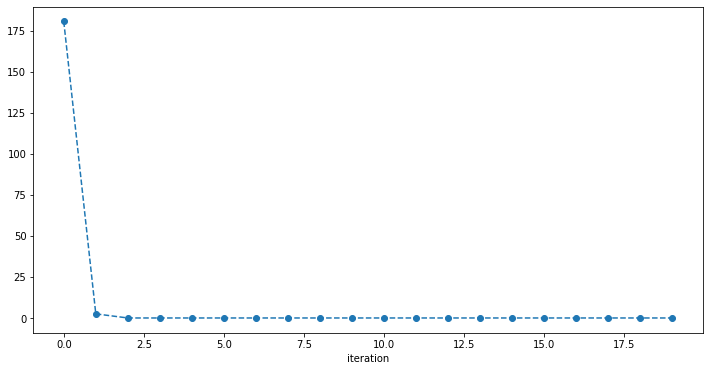

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(loss_score, '--o')
plt.xlabel('iteration');

## With minibatch

In [32]:
from spacy.util import minibatch, compounding

In [33]:
loss8 = []
for i in range(8):
  # losses2 = {}
  batches = minibatch(train, size=compounding(4.0, 28.0, 1.001))
  for batch in batches:
    texts, annotations = zip(*batch)
    nlp.update(
        texts,
        annotations,
        drop=.4,
        losses=losses
    )
  loss8.append(losses['ner'])
  print(f'Losses at iteration {i} - {dt.datetime.now()}', losses.values)

Losses at iteration 0 - 2021-03-01 12:52:59.441191 <built-in method values of dict object at 0x7fd0f4f74400>
Losses at iteration 1 - 2021-03-01 12:52:59.681565 <built-in method values of dict object at 0x7fd0f4f74400>
Losses at iteration 2 - 2021-03-01 12:52:59.920178 <built-in method values of dict object at 0x7fd0f4f74400>
Losses at iteration 3 - 2021-03-01 12:53:00.173256 <built-in method values of dict object at 0x7fd0f4f74400>
Losses at iteration 4 - 2021-03-01 12:53:00.416968 <built-in method values of dict object at 0x7fd0f4f74400>
Losses at iteration 5 - 2021-03-01 12:53:00.676066 <built-in method values of dict object at 0x7fd0f4f74400>
Losses at iteration 6 - 2021-03-01 12:53:00.918165 <built-in method values of dict object at 0x7fd0f4f74400>
Losses at iteration 7 - 2021-03-01 12:53:01.181788 <built-in method values of dict object at 0x7fd0f4f74400>


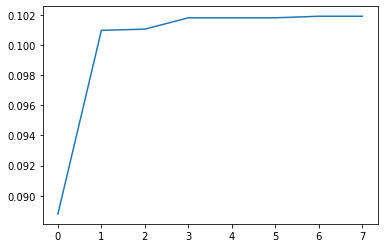

In [34]:
plt.plot(loss8)

In [25]:
nlp.pipeline

[('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x7f867374dc40>)]

In [19]:
test_doc = nlp('I would love to play Fed Cup and French Open')

In [22]:
displacy.render(test_doc, style='ent')

In [40]:
nlp.to_disk('models/nlp_ner1')